In [44]:
#Importing librabry 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas
from statsmodels.tsa.seasonal import seasonal_decompose

In [45]:
#Importing dataset 
data_set = pd.read_csv('https://tinyurl.com/ChrisCoDV/001195868/VenueDailyVisitors.csv', index_col=0)
data_set.index = pd.to_datetime(data_set.index)

In [46]:
#reindexing the data frame 
data_set = data_set.reindex(data_set.sum().sort_values(ascending=False).index, axis=1)
data_set.head()

,RDA,SJU,SPF,PXI,PDT,QRY,QJL,CWN,BEY,DKS,...,AXM,VRD,XXO,BQV,ZPL,BKI,ZJB,YDI,AEQ,YVW
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,580,479,490,539,261,286,289,225,219,208,...,66,77,65,0,66,0,0,0,0,0
2019-01-02,451,540,493,500,283,234,244,250,206,178,...,38,53,95,0,64,0,0,0,0,0
2019-01-03,493,487,467,408,237,235,195,180,155,152,...,64,63,98,0,54,0,0,0,0,0
2019-01-04,451,429,350,329,202,219,146,169,124,121,...,61,51,90,0,75,0,0,0,0,0
2019-01-05,320,345,357,344,203,160,186,145,128,133,...,77,54,99,0,60,0,0,0,0,0


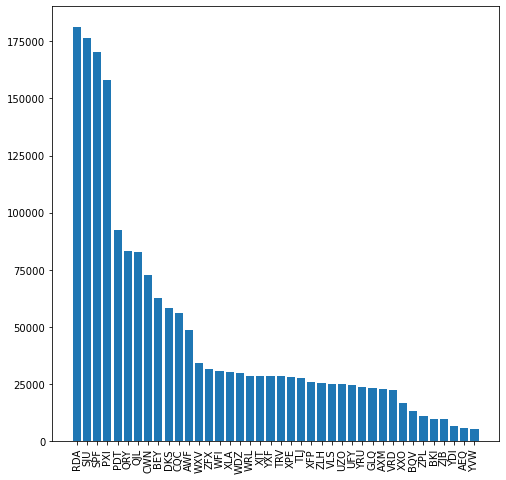

In [47]:
plt.figure(figsize=(8,8))
x_pos = np.arange(len(data_set.columns))
plt.bar(x_pos, data_set.sum(), align='center')
plt.xticks(x_pos, data_set.columns, rotation = 90)
plt.show()

In [48]:
#Visualizing the dataset after sorting 

In [49]:
segmentdata = data_set.sum()

segmentdata = segmentdata.reindex(segmentdata.sort_values(ascending=False).index, axis=1)

print(segmentdata)

RDA    181164
SJU    176547
SPF    170180
PXI    158149
PDT     92278
QRY     83241
QJL     82773
CWN     72543
BEY     62472
DKS     58354
CQC     56248
AWF     48587
WXV     34207
ZFX     31763
WFI     30625
XLA     30484
WDZ     30078
WRL     28657
XJT     28542
YXF     28495
TRV     28487
XPE     28297
TLJ     27738
XFP     26117
ZLH     25549
VLS     25149
UZO     24963
UFY     24808
YRU     23737
GLQ     23303
AXM     22783
VRD     22435
XXO     16871
BQV     13306
ZPL     11030
BKI      9831
ZJB      9706
YDI      6737
AEQ      5651
YVW      5184
dtype: int64


In [50]:
high_volume, medium_volume, low_volume,very_low_volume = ([] for i in range(4))
for name in data_set.columns:
    total_sum = data_set[name].sum()
    if(total_sum>100000):
        high_volume.append(name)
    elif(total_sum>40000):
        medium_volume.append(name)
    elif(total_sum>15000):
        low_volume.append(name)
    else:
        very_low_volume.append(name)

In [51]:
print (high_volume)

['RDA', 'SJU', 'SPF', 'PXI']


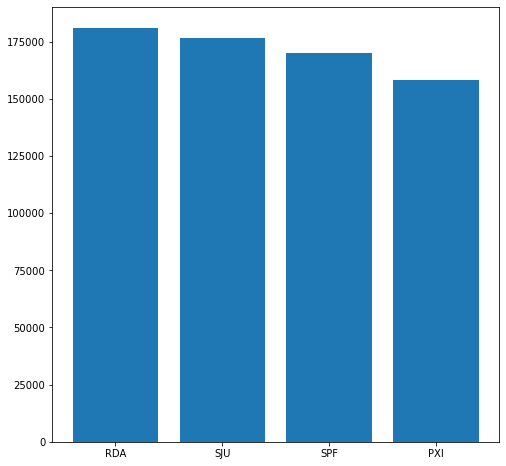

In [52]:
plt.figure(figsize=(8,8))
x_pos = np.arange(len(data_set[high_volume].columns))
plt.bar(x_pos, data_set[high_volume].sum(), align='center')
plt.xticks(x_pos, data_set[high_volume].columns)
plt.show()

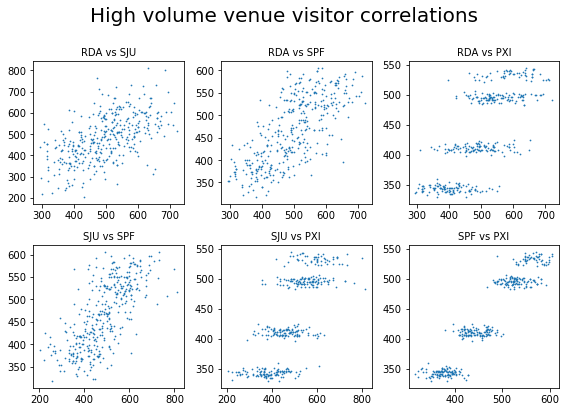

In [53]:
#Visualizing high volume correlation 
counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('High volume venue visitor correlations', fontsize=20, position=(0.5, 1.0))
for i, name_i in enumerate(high_volume):
    for j in range(i + 1, len(high_volume)):
        name_j = high_volume[j]
        sub = fig.add_subplot(3, 3, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=10)
        sub.scatter(data_set[name_i], data_set[name_j], s=0.5)
        counter += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()

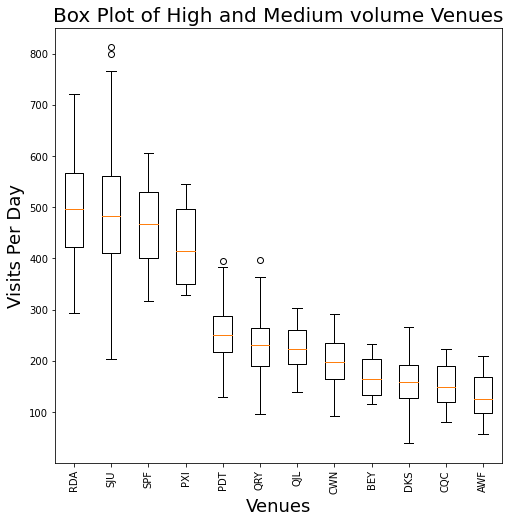

In [73]:
box_plot = high_volume + medium_volume
plt.figure(figsize=(8, 8))
plt.boxplot(data_set[box_plot], labels=box_plot)
plt.xlabel('Venues', fontsize=18)
plt.ylabel('Visits Per Day', fontsize=18)
plt.title('Box Plot of High and Medium volume Venues', fontsize=20)
plt.xticks(rotation=90)
plt.show()

C:\Users\Machine\AppData\Local\Temp/ipykernel_10032/1224838081.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(data_set[name], model='multiplicative', freq=7)


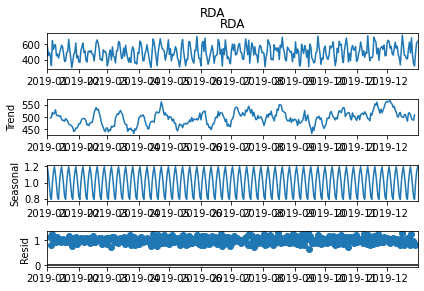

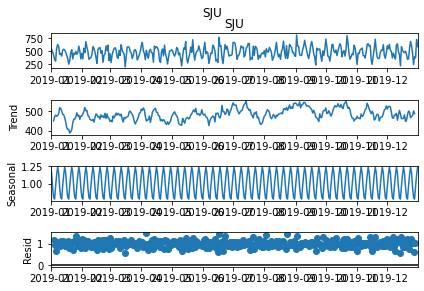

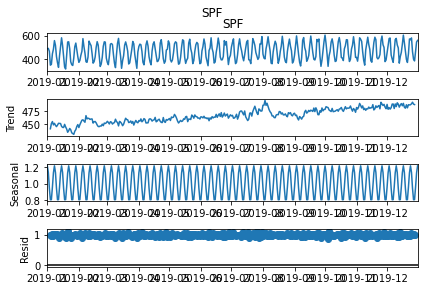

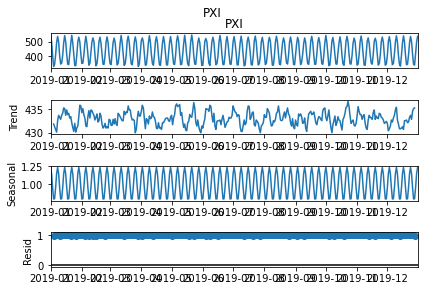

In [56]:
for name in high_volume:
    result = seasonal_decompose(data_set[name], model='multiplicative', freq=7)
    result.plot()
    plt.suptitle('' + name, position=(0.5, 1.0))
    plt.show()


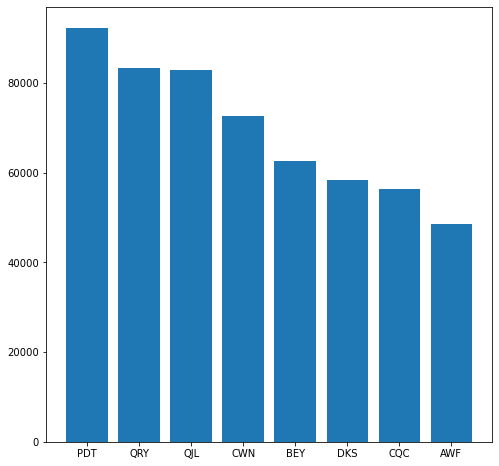

In [57]:
plt.figure(figsize=(8,8))
x_pos = np.arange(len(data_set[medium_volume].columns))
plt.bar(x_pos, data_set[medium_volume].sum(), align='center')
plt.xticks(x_pos, data_set[medium_volume].columns)
plt.show()

In [82]:
very_low_volume

['BQV', 'ZPL', 'BKI', 'ZJB', 'YDI', 'AEQ', 'YVW']

In [78]:
plot = data_set[medium_volume].hvplot.line (
frame_height = 500, frame_width= 500,
xlabel = 'Date', ylabel = 'volume',
title = 'Medium volume')
plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

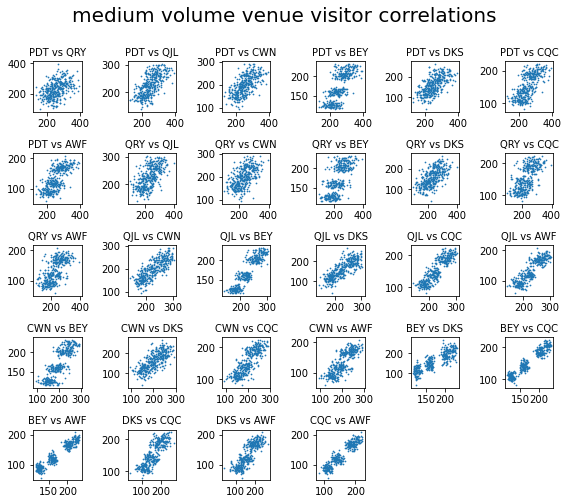

In [59]:
counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('medium volume venue visitor correlations', fontsize=20, position=(0.5, 1.0))
for i, name_i in enumerate(medium_volume):
    for j in range(i + 1, len(medium_volume)):
        name_j = medium_volume[j]
        sub = fig.add_subplot(6,6, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=10)
        sub.scatter(data_set[name_i], data_set[name_j], s=0.5)
        counter += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()

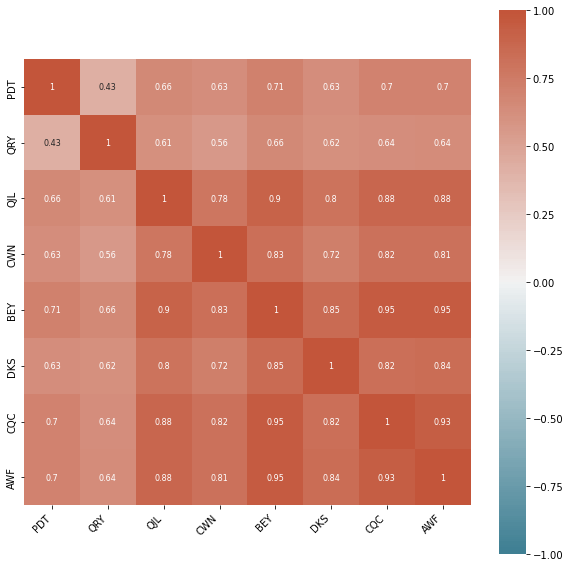

In [60]:
plt.figure(figsize=(10, 10))
corr = data_set[medium_volume].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

['WXV', 'ZFX', 'WFI', 'XLA', 'WDZ', 'WRL', 'XJT', 'YXF', 'TRV', 'XPE', 'TLJ', 'XFP', 'ZLH', 'VLS', 'UZO', 'UFY', 'YRU', 'GLQ', 'AXM', 'VRD', 'XXO']


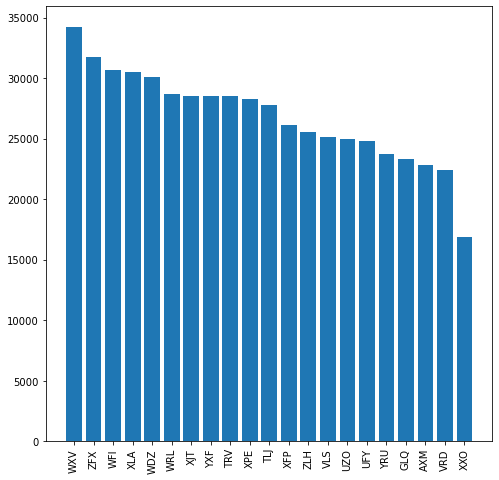

In [61]:
print (low_volume)
plt.figure(figsize=(8,8))
x_pos = np.arange(len(data_set[low_volume].columns))
plt.bar(x_pos, data_set[low_volume].sum(), align='center')
plt.xticks(x_pos, data_set[low_volume].columns, rotation=90)
plt.show()

In [62]:
very_low_volume

['BQV', 'ZPL', 'BKI', 'ZJB', 'YDI', 'AEQ', 'YVW']

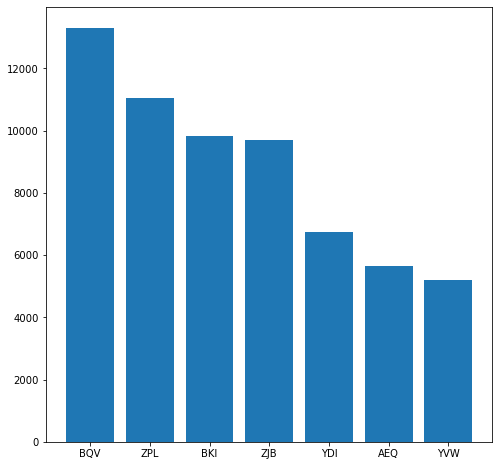

In [63]:
plt.figure(figsize=(8,8))
x_pos = np.arange(len(data_set[very_low_volume].columns))
plt.bar(x_pos, data_set[very_low_volume].sum(), align='center')
plt.xticks(x_pos, data_set[very_low_volume].columns)
plt.show()

In [74]:
#Detecting Anomalies
monthly_visitors=data_set.groupby(by=[data_set.index.month_name()], sort=False)[data_set.columns].sum()

print(monthly_visitors.transpose())

Date  January  February  March  April    May   June   July  August  September  \
RDA     15124     13652  14352  15223  14773  14531  16117   15539      14431   
SJU     14268     13331  14389  14220  14611  14287  15532   15285      15227   
SPF     13852     12727  13878  13859  14228  13844  14772   14446      14169   
PXI     13559     12120  13230  13146  13370  12883  13636   13237      13025   
PDT      7618      6532   7133   7600   8192   7652   7938    7803       7524   
QRY      7237      6367   6876   6944   7055   6835   7239    7253       6809   
QJL      6856      6055   6865   6739   6908   6695   7130    7056       7005   
CWN      6220      5292   6021   6085   5796   5854   6212    6201       6057   
BEY      5351      4756   5162   5201   5278   5077   5406    5212       5145   
DKS      5025      4223   4810   4695   4985   4900   5187    5050       4743   
CQC      4750      4253   4616   4743   4686   4562   4904    4725       4637   
AWF      4231      3739   40

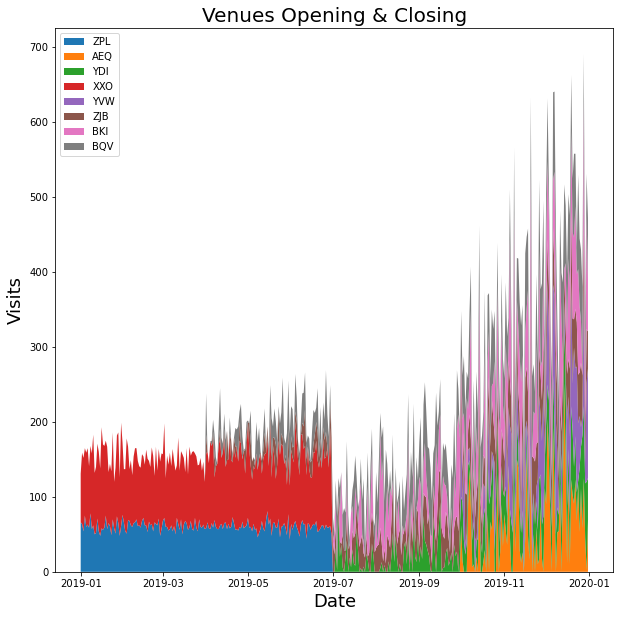

In [75]:
data_sorted = data_set.reindex(data_set.sum().sort_values(ascending=False).index, axis=1)

selected = ['ZPL','AEQ','YDI','XXO','YVW','ZJB','BKI','BQV']

plt.figure(figsize=(10, 10))

plt.stackplot(data_sorted.index, data_sorted[selected].transpose())

plt.xlabel('Date', fontsize=18)

plt.ylabel('Visits', fontsize=18)

plt.title('Venues Opening & Closing', fontsize=20)

plt.legend(selected, loc=2)

plt.show()

In [64]:
venue_age = pd.read_csv('https://tinyurl.com/ChrisCoDV/001195868/VenueAge.csv',index_col=0)
venue_distance = pd.read_csv('https://tinyurl.com/ChrisCoDV/001195868/VenueDistance.csv',index_col=0)
venue_duration = pd.read_csv('https://tinyurl.com/ChrisCoDV/001195868/VenueDuration.csv',index_col=0)
venue_gender = pd.read_csv('https://tinyurl.com/ChrisCoDV/001195868/VenueGender.csv',index_col=0)
venue_spend = pd.read_csv('https://tinyurl.com/ChrisCoDV/001195868/VenueSpend.csv',index_col=0)

In [65]:
summary = pd.DataFrame(index=data_set.columns)
summary['age'] = venue_age.values
summary['distance'] = venue_distance.values
summary['duration'] = venue_duration.values
summary['gender'] = venue_gender.values
summary['spend'] = venue_spend.values
summary['visit'] = data_set.sum().values


In [66]:
print(summary.head())

     age  distance  duration  gender  spend   visit
RDA   44        34       104      43     22  181164
SJU   42         9        93      43     15  176547
SPF   50         2        86      44     33  170180
PXI   29         9        78      53     18  158149
PDT   44         3       103      41     26   92278


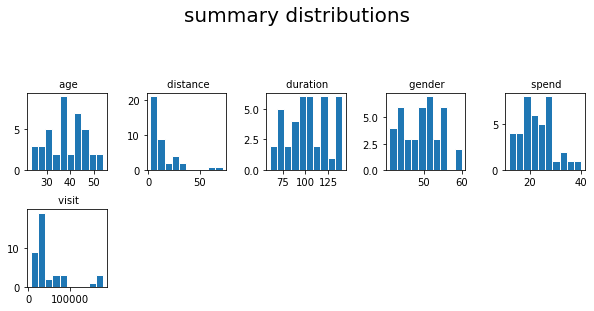

In [68]:
#Histogram 
counter = 1
fig = plt.figure(figsize=(10, 10))
fig.suptitle('summary distributions', fontsize=20, position=(0.5, 1.0))
for name in summary:
    sub = fig.add_subplot(5, 5, counter)
    sub.set_title(' ' + name, fontsize=10)
    sub.hist(summary[name], edgecolor='w')
    counter += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


In [83]:
plot = summary.corr().hvplot.heatmap(
frame_height = 500, frame_width=500,
title = 'correlations', rot=90, cmap='coolwarm').opts(invert_yaxis=True, clim = (-1,1)) 
plot

:HeatMap   [columns,index]   (value)